# Prey Capture in Autism-Related Rat Models: Behavioral Phenotyping of Arid1b, Grin2b, and Scn2a Strains

This tutorial shows how to access the data related to [EMBER:000204](https://dandi.emberarchive.org/dandiset/000204) using pynwb.

This dataset contains behavioral data from the prey capture experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).


**Contents:**

1. [Setup and Data Access](#setup)
2. [Session and Subject Metadata](#metadata)
3. [Access Devices Metadata](#devices)
4. [Access Behavioral Videos](#behavior)
5. [Access USV Data](#usv)


---

# 1. Setup and Data Access <a id="setup"></a>

## Import Required Libraries

In [1]:
# Core data manipulation and analysis
from pathlib import Path

import h5py

# Visualization
import matplotlib.pyplot as plt
import remfile
from dandi.dandiapi import DandiAPIClient, DandiInstance

# NWB and DANDI access
from pynwb import NWBHDF5IO

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Data Access Functions

In [2]:
def load_nwb_from_dandi(dandiset_id, subject_id, session_id):
    """
    Load NWB file from DANDI Archive via streaming.
    """
    pattern = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}*.nwb"
    dandi_instance = DandiInstance(
        "ember",
        "https://dandi.emberarchive.org",
        "https://api-dandi.emberarchive.org/api",
    )
    with DandiAPIClient(dandi_instance=dandi_instance) as client:
        client.dandi_authenticate()
        assets = client.get_dandiset(dandiset_id, "draft").get_assets_by_glob(
            pattern=pattern, order="path"
        )

        s3_urls = []
        for asset in assets:
            s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)
            s3_urls.append(s3_url)

        if len(s3_urls) != 1:
            raise ValueError(f"Expected 1 file, found {len(s3_urls)} for pattern {pattern}")

        s3_url = s3_urls[0]

    file = remfile.File(s3_url)
    h5_file = h5py.File(file, "r")
    io = NWBHDF5IO(file=h5_file, load_namespaces=True)
    nwbfile = io.read()

    return nwbfile, io


def load_nwb_local(directory_path, subject_id, session_id):
    """
    Load NWB file from local directory.
    """
    directory_path = Path(directory_path)
    nwbfile_path = directory_path / f"sub-{subject_id}_ses-{session_id}.nwb"
    
    if not nwbfile_path.exists():
        raise FileNotFoundError(f"NWB file not found: {nwbfile_path}")
    
    io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
    nwbfile = io.read()
    
    return nwbfile, io

In [3]:
# Load session data
dandiset_id = "000204"
session_id = "PC-TestD4"
subject_id = "252-Arid1b(1)"

# Choose data source (DANDI streaming or local)
USE_DANDI = True  # Set to False to use local files

if USE_DANDI:
    nwbfile, io = load_nwb_from_dandi(dandiset_id, subject_id, session_id)
else:
    # Specify your local directory path
    local_directory = "YOUR_DIRECTORY_PATH"  # Replace with actual path
    nwbfile, io = load_nwb_local(local_directory, subject_id, session_id)

c:\Users\amtra\anaconda3\envs\kind-lab-to-nwb-env\Lib\site-packages\hdmf\spec\namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


---

# 2. Session and Subject Metadata <a id="metadata"></a>

In [4]:
print("=== SESSION INFORMATION ===")
print(f"Experiment description:\n {nwbfile.experiment_description}")
print(f"Session description:\n {nwbfile.session_description}")
print(f"Session start time:\n {nwbfile.session_start_time}")

=== SESSION INFORMATION ===
Experiment description:
 This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB.
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing.
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated prey capture behavior in different rat models
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518,
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515,
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530) using live cr

In [5]:
print("=== SUBJECT INFORMATION ===")
print(f"ID: {nwbfile.subject.subject_id}")
print(f"Age: {nwbfile.subject.age}")
print(f"Species: {nwbfile.subject.species}")
print(f"Strain: {nwbfile.subject.strain}")
print(f"Genotype: {nwbfile.subject.genotype}")
print(f"Sex: {nwbfile.subject.sex}")

=== SUBJECT INFORMATION ===
ID: 252-Arid1b(1)
Age: None
Species: Rattus norvegicus
Strain: Arid1b
Genotype: HET
Sex: M


---

# 3. Access Devices Metadata <a id="devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["camera_device 0"]

camera_device 0 abc.CameraDevice at 0x3019818451664
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

In [7]:
nwbfile.devices["Arena"]

Arena pynwb.device.Device at 0x3019818368720
Fields:
  description: Square arena (100x100 cm) with 50cm high white walls and wood-lined floor
  manufacturer: Example Manufacturer

In [8]:
nwbfile.devices["USVMicrophone"]

USVMicrophone pynwb.device.Device at 0x3019818879504
Fields:
  description: M500 USB Pettersson microphone for recording ultrasonic vocalizations, hanging approx. 1m above the arena.
  manufacturer: Pettersson, Wildlife Services UK

---

# 4. Access Behavioral Video <a id="behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [9]:
for name in nwbfile.acquisition:
    if "BehavioralVideo" in name:
        print(name)

BehavioralVideoTestTrial1
BehavioralVideoTestTrial2
BehavioralVideoTestTrial3
BehavioralVideoTestTrial4


In [10]:
video = nwbfile.acquisition["BehavioralVideoTestTrial1"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),0
Compressed size (bytes),0
Compression ratio,undefined
Data type,float64
Shape,"(2660,)"


The video filepath:

In [11]:
video.external_file[0]

'sub-252-Arid1b(1)_ses-PC-TestD4_image\\c4bee8bd-c7b5-48f8-8cb0-67644daf6caa_external_file_0.mp4'

The metadata of the device used to record the behavioral video:


In [12]:
video.device

camera_device 0 abc.CameraDevice at 0x3019818451664
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

In [19]:
nwbfile.intervals["epochs"].to_dataframe()

,start_time,stop_time,task_name,tags
id,,,,
0,0.0,106.40,test_4_trial1,[01]
1,211.0,363.80,test_4_trial2,[01]
2,515.0,640.44,test_4_trial3,[01]
3,732.0,855.28,test_4_trial4,[01]


---

# 5. Access USV and Detection Data <a id="usv"></a>

If present, USV (ultrasonic vocalization) audio files are stored in the NWB file as acquisitions:


In [13]:
# List all USV audio files
for name in nwbfile.acquisition:
    if "AcousticWaveformSeries" in name:
        print(name)

AcousticWaveformSeriesTestTrial1
AcousticWaveformSeriesTestTrial2
AcousticWaveformSeriesTestTrial3
AcousticWaveformSeriesTestTrial4


In [14]:
nwbfile.acquisition["AcousticWaveformSeriesTestTrial1"]

Data type,int32
Shape,"(22965248,)"
Array size,87.61 MiB
Chunk shape,"(2500000,)"
Compression,gzip
Compression opts,4
Uncompressed size (bytes),91860992
Compressed size (bytes),37016474
Compression ratio,2.481624586933915


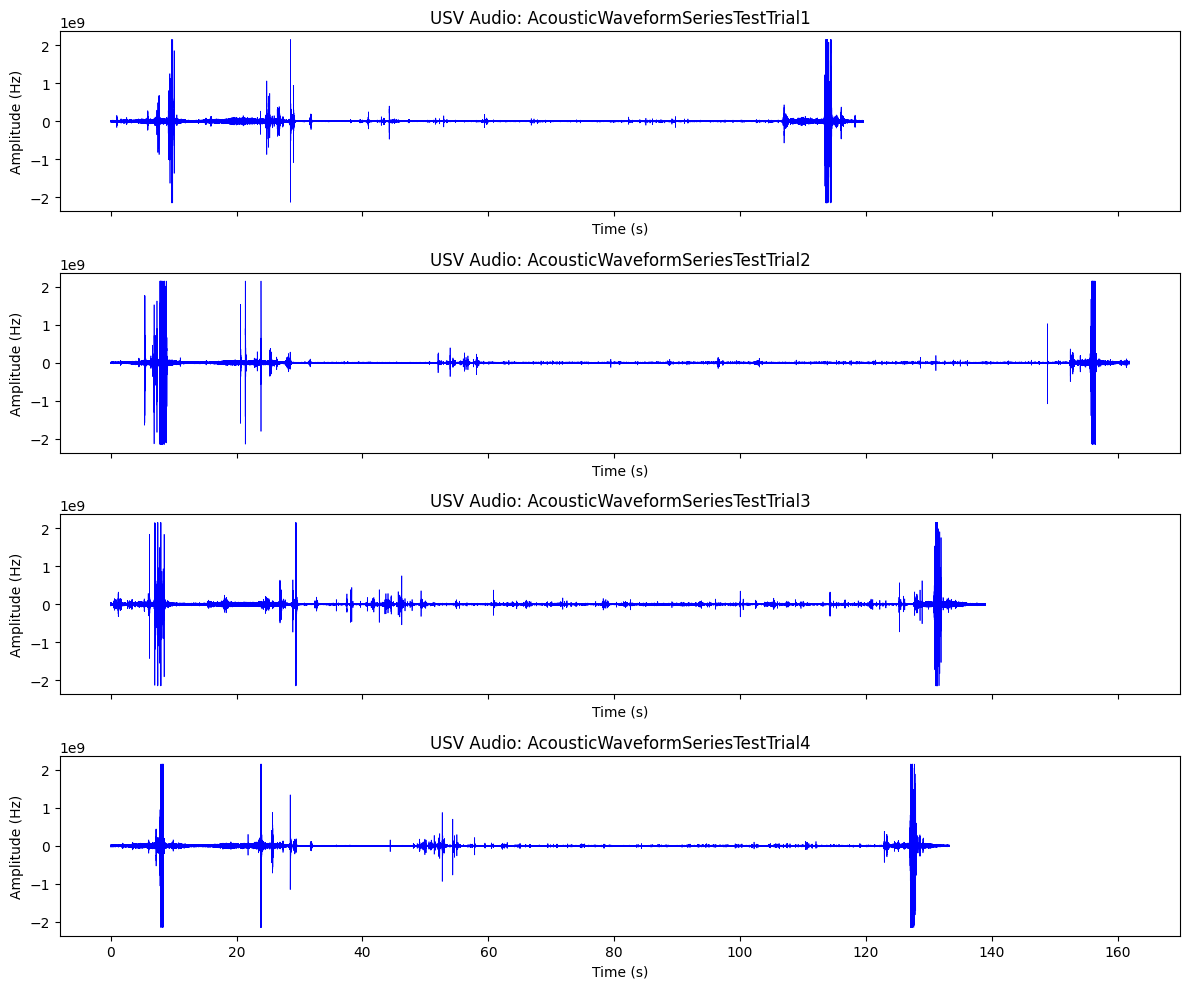

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# List all audio acquisitions
audio_keys = [key for key in nwbfile.acquisition if "AcousticWaveformSeries" in key]

# Create subplots
fig, axes = plt.subplots(len(audio_keys), 1, figsize=(12, 10), sharex=True)

if len(audio_keys) == 1:
    axes = [axes]  # Ensure axes is iterable for a single subplot

for ax, key in zip(axes, audio_keys):
    # Access the audio data and sampling rate
    audio_data = nwbfile.acquisition[key].data[:]
    sampling_rate = nwbfile.acquisition[key].rate

    # Generate time axis
    time_axis = np.arange(len(audio_data)) / sampling_rate

    # Plot the audio data
    ax.plot(time_axis, audio_data, color='blue', linewidth=0.5)
    ax.set_title(f"USV Audio: {key}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (Hz)")

plt.tight_layout()
plt.show()